<p style="font-family: Impact, Charcoal, sans-serif; color: darkblue; font-size: 33px; font-weight: bold; line-height: 1.2">  유튜브의 대표적인 EDM 채널 중 하나인 Spinnin' Record의 관련 채널 생태계를 직접 수집한 데이터를 통하여 시각화하였다. </p>

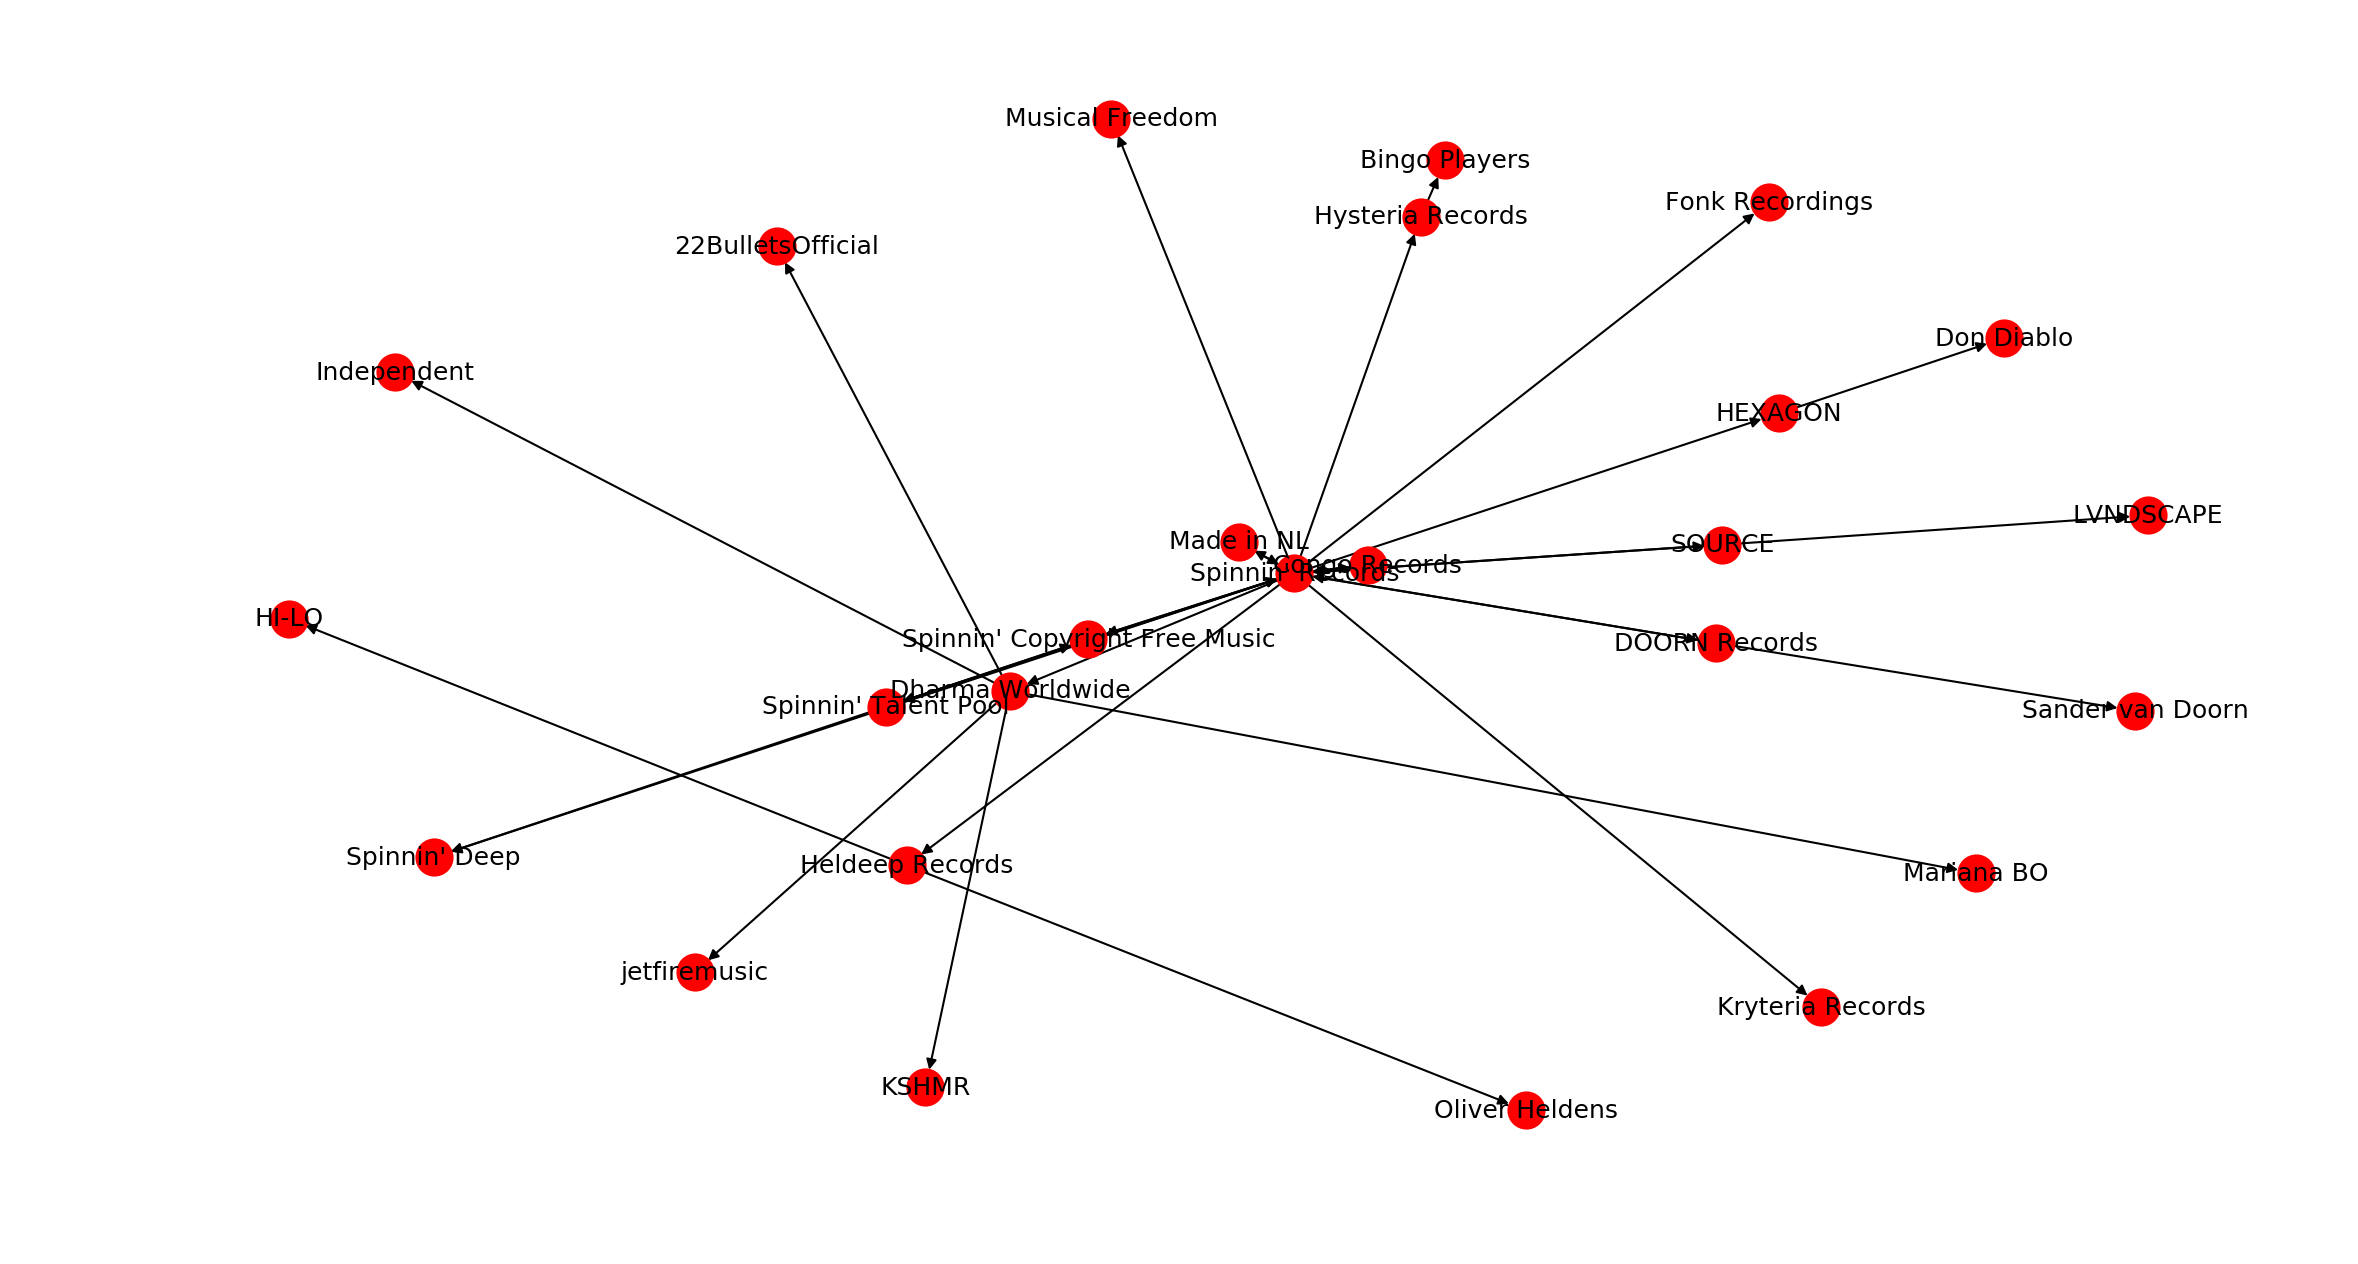

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

figure(num=None, figsize=(15, 8), dpi=150)

def get_data(filename):
    with open(filename, 'r', encoding='utf8') as rf:

        lines = rf.read().split("\n")
        data = [line.split("\t") for line in lines]
        header = data[0]
        data = data[1:]
    return header, data

node_header, node_data = get_data('nodes.tsv')
edge_header, edge_data = get_data('edges.tsv')

G = nx.DiGraph(directed=True)

for node in node_data:
    G.add_node(int(node[0]), name=node[1])

for edge in edge_data:
    G.add_edge(int(edge[0]), int(edge[1]))


dc = nx.degree_centrality(G)
cc = nx.closeness_centrality(G)
bc = nx.betweenness_centrality(G)

labeldict = {int(node[0]):node[1] for node in node_data}

# visualize this
nx.draw_spring(G, labels=labeldict, with_labels=True)
plt.show()

> * Fonk Recordings의 경우 기존의 다른 노드들과 이어지지 않는 수많은 다른 노드들과 이어져 있어 시각화의 편리를 위하여 해당 노드만 남기고 제거하였다.

<p style="font-family: Impact, Charcoal, sans-serif; color: #a1140a; font-size: 25px; font-weight: bold; line-height: 1.2">  각 노드의 degree centrality </p>

In [2]:
dc_dict = {v: dc[k] for k, v in labeldict.items()}
dc_df = pd.DataFrame({"채널명": list(dc_dict.keys()), "degree_centrality": list(dc_dict.values())})
dc_df

,채널명,degree_centrality
0,Spinnin' Records,0.80
1,Spinnin' Deep,0.08
2,Spinnin' Copyright Free Music,0.16
3,Spinnin' Talent Pool,0.20
4,SOURCE,0.12
5,Made in NL,0.08
6,DOORN Records,0.12
7,Musical Freedom,0.04
8,HEXAGON,0.08
9,Heldeep Records,0.12


<p style="font-family: Impact, Charcoal, sans-serif; color: #a1140a; font-size: 25px; font-weight: bold; line-height: 1.2">  각 노드의 closeness centrality </p>

In [3]:
cc_dict = {v: cc[k] for k, v in labeldict.items()}
cc_df = pd.DataFrame({"채널명": list(cc_dict.keys()), "closeness_centrality": list(cc_dict.values())})
cc_df

,채널명,closeness_centrality
0,Spinnin' Records,0.240000
1,Spinnin' Deep,0.163333
2,Spinnin' Copyright Free Music,0.144000
3,Spinnin' Talent Pool,0.144000
4,SOURCE,0.130909
5,Made in NL,0.130909
6,DOORN Records,0.130909
7,Musical Freedom,0.150769
8,HEXAGON,0.150769
9,Heldeep Records,0.150769


<p style="font-family: Impact, Charcoal, sans-serif; color: #a1140a; font-size: 25px; font-weight: bold; line-height: 1.2">  각 노드의 betweenness centrality </p>

In [4]:
bc_dict = {v: bc[k] for k, v in labeldict.items()}
bc_df = pd.DataFrame({"채널명": list(bc_dict.keys()), "betweenness_centrality": list(bc_dict.values())})
bc_df

,채널명,betweenness_centrality
0,Spinnin' Records,0.230833
1,Spinnin' Deep,0.000000
2,Spinnin' Copyright Free Music,0.000000
3,Spinnin' Talent Pool,0.000833
4,SOURCE,0.010000
5,Made in NL,0.000000
6,DOORN Records,0.010000
7,Musical Freedom,0.000000
8,HEXAGON,0.011667
9,Heldeep Records,0.023333
